# WeRateDogs project

## Gathering

In [111]:
import pandas as pd
import numpy as np
import requests
import re
import os
import json
import tweepy
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from scipy import stats
from PIL import Image
from io import BytesIO
import datetime
import warnings
warnings.filterwarnings('ignore')
from tweepy import OAuthHandler
from timeit import default_timer as timer

### 1 - gather df_archive from csv file

In [112]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### 2 - gather df_image_pred from url using requests library

In [113]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = url.split('/')[-1]
if not os.path.isfile(filename):
    with open(os.path(filename), mode = 'w') as file:
        file.write(response.content)

In [114]:
df_image_pred = pd.read_csv('image-predictions.tsv', sep = ('\t'))
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3- gather df_api with additional data

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, )


tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [15]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        print(type(line))
        tweet = json.loads(line)
        print(type(tweet))
        print(tweet)
        break

<class 'str'>
<class 'dict'>
{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},

In [98]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
df_api = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count', 'user_count'])
df_api.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


# assess

In [99]:
df_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rizzy. She smiles a lot...,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,None,None,None,None
1183,718939241951195136,NaN,NaN,2016-04-09 23:10:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. Everybody look at Otis. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718939241...,12,10,Otis,None,None,None,None
1310,707038192327901184,NaN,NaN,2016-03-08 03:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,None,None,None,None
2058,671347597085433856,NaN,NaN,2015-11-30 15:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She was not fully prepared for t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671347597...,9,10,Lola,None,None,None,None
1122,730573383004487680,NaN,NaN,2016-05-12 01:40:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rooney. He can't comprehend glass. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730573383...,10,10,Rooney,None,None,pupper,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
955,751598357617971201,NaN,NaN,2016-07-09 02:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. A cat got his tongue. 13/10 ador...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751598357...,13,10,Toby,None,None,None,None
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None
667,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,None,None,None,None


In [100]:
df_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
an                7
Daisy             7
Bailey            7
Buddy             7
Scout             6
Jack              6
Oscar             6
Koda              6
Stanley           6
Jax               6
Milo              6
Rusty             6
Dave              6
Leo               6
Bella             6
Louis             5
               ... 
Cleopatricia      1
Kenzie            1
Dante             1
Pumpkin           1
light             1
Tilly             1
Rey               1
Emanuel           1
Billl             1
Sora              1
Jessifer          1
Reagan            1
Butters           1
Bilbo             1
Alejandro         1
Dotsy             1
Jebberson         1
Zooey             1
Acro              1


- only original tweets required not retweets or replies or tweets without images
- missing values of in reply to status id,in reply to user id,retweeted_status_id,retweeted_status_user_id,	retweeted_status_timestamp
- unavailable dognames (none, a, an , the)
- tiddness ( df_api + df_archive + df_api)

In [101]:
df_archive.shape

(2356, 17)

In [102]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [103]:
df_archive_null = df_archive[df_archive['expanded_urls'].isnull() == True]
df_archive_null

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


- tweet id,in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id                           are strings not floats .
- time stamp , retweeted_status_timestamp are datetimes not strings 
- dog stages are category not string

In [104]:
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [105]:
df_archive[df_archive['rating_numerator'].isnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [106]:
df_archive[df_archive['rating_denominator'].isnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [107]:
df_archive[df_archive['text'].isnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [108]:
df_archive[df_archive['rating_numerator'] < 10].shape


(440, 17)

In [109]:
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [110]:
df_archive['text'][1120]

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [111]:
df_archive['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [112]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

- dogs stage type are columns values shouldn't be columns names


In [113]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- unlogical rating values

In [114]:
df_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [115]:
df_image_pred[df_image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [116]:
df_image_pred[df_image_pred['p1_dog'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [117]:
df_image_pred[df_image_pred['p1'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [118]:
df_image_pred[df_image_pred['p1_conf'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [119]:
df_image_pred[df_image_pred['img_num'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [120]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [121]:
df_image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

- tweet_id is string
- img_num is category
- p2 & p3 columns not needed , the first prediction is higher probabilty
- names of p1 & p1_dog & p1_conf is not Better representation
- different predictions for dog images
- some predictions are not dogs

In [122]:
df_api

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [123]:
df_api[df_api.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,user_count


In [124]:
sum(df_api.user_count.isnull())

0

## assessment summary

### A- Missing data (completeness issue) :

- missing values of in reply to status id,in reply to user id,retweeted_status_id,retweeted_status_user_id,	retweeted_status_timestamp in archived dataframe .

### B- Tidiness issues:

- 1.requiered one dataframe .
- 2.dogs stage type are columns values shouldn't be columns names .
- 3.p2 & p3 columns not needed , the first prediction is higher probabilty and names of p1 & p1_dog & p1_conf is not Better representation

### C- Quality issues:

#### validity

- only original tweets required not retweets or replies or without images.
- tweet id is string not floats .
- time stamp  is datetimes not strings 
- dog stages are category not string
- img_num is category



#### accuracy

- unavailable dognames (none, a, an , the).

#### consistency
- i will uniform the rating method so the rating_numerator from 5 to 15 and rating_denominator must be 10 .
- columns arrange in not the best way.


# clean

In [125]:
archive_clean = df_archive.copy()
image_clean = df_image_pred.copy()
api_clean = df_api.copy()

###  Tidiness issue
- dogs stage type are columns values shouldn't be columns names .


### define
- add all floofer, pupper, puppo columns to one column dog_stage

In [126]:
archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace('None','')
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
archive_clean.loc[archive_clean.dog_stage == "", 'dog_stage'] = np.nan
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
archive_clean['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [127]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


###  Tidiness issue
- p2 & p3 columns not needed , the first prediction is higher probabilty
- names of p1 & p1_dog & p1_conf is not Better representation

### define
- drop columns of p2 & p3
- rename the 3 columns of p1

In [128]:
image_clean = image_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis= 1)
image_clean = image_clean.rename(columns={'p1':'breed','p1_conf':'accuracy', 'p1_dog':'is_dog'})

In [129]:
image_clean

,tweet_id,jpg_url,img_num,breed,accuracy,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True


#### validity
- only original tweets required not retweets or replies or tweets without images.

#### define
- from image df take only ids of tweets with images to the archived df then take the df of orginal tweets no replies or retweets. 
- also for the image_cleaned dataframe , drop the retweet and replies.

In [130]:
tweets_with_image = list(image_clean.tweet_id.unique())
len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]
api_clean = api_clean[api_clean.tweet_id.isin(tweets_with_image)]

In [131]:
archive_clean.shape

(2075, 14)

In [132]:
api_clean.shape

(2073, 4)

In [133]:
retweet_entries = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_entries].shape

(81, 14)

In [134]:
replied_entries = archive_clean.in_reply_to_status_id.notnull()
archive_clean[replied_entries].shape

(23, 14)

In [135]:
archive_clean = archive_clean[~retweet_entries & ~replied_entries]
archive_clean.shape

(1971, 14)

In [136]:
np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))
image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))]
image_clean.shape

(1971, 6)

In [137]:
np.logical_not(api_clean.tweet_id.isin(list(archive_clean.tweet_id)))
api_clean = api_clean[~np.logical_not(api_clean.tweet_id.isin(list(archive_clean.tweet_id)))]
api_clean.shape

(1971, 4)

#### Missing data
- missing values of in reply to status id,in reply to user id,retweeted_status_id,retweeted_status_user_id,	retweeted_status_timestamp in archived dataframe .
#### validity
- only original tweets required not retweets or replies.

#### define
- drop all columns of retweet and replies as it is not needed for my cleaned dataframe , the reqiered is orginal tweets.

In [138]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [139]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis = 1)

In [140]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### accuracy

- unavailable dognames (none, a, an , the).

#### define
- convert the weird names to NaN.

In [141]:
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            archive_clean.loc[index,'name'] = np.nan

            
archive_clean.name.value_counts(dropna = False)

NaN           592
Charlie        11
Oliver         10
Cooper         10
Lucy           10
Tucker          9
Penny           9
Sadie           8
Winston         8
Daisy           7
Lola            7
Toby            7
Jax             6
Stanley         6
Bella           6
Koda            6
Bo              6
Zoey            5
Dave            5
Louis           5
Milo            5
Bailey          5
Scout           5
Oscar           5
Buddy           5
Leo             5
Chester         5
Rusty           5
Gary            4
Duke            4
             ... 
Blue            1
Jett            1
Shadoe          1
Ashleigh        1
Kirk            1
Longfellow      1
Huxley          1
Billl           1
Rueben          1
Sojourner       1
Aldrick         1
Nimbus          1
Julio           1
Snoop           1
Lili            1
Chelsea         1
Harry           1
Birf            1
Emanuel         1
Sora            1
Emmy            1
Halo            1
Reagan          1
Butters         1
Bilbo     

#### consistency
- rating_numerators and rating_denominators are incorrect .

#### define
- make the denominator to be 10 or a number is divisble by 10 when the tweet has more than 1 dog in image.
- according to the old tweets and the rating method used in the beginning of weratedogs twitter account when the numenator is less the denominator, i will suppose the minimum numerator is 5 .
- i will use the dataframe when the ratio between rating_numerator and rating_denominator is less than 1.5 , the logical ratio used in weratedogs account is less than 15/10.
- before all , deal with the rating_numerator as a float extracted from text.

In [142]:
archive_clean['rating_numerator'] = archive_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

In [143]:
archive_clean = archive_clean[archive_clean['rating_denominator'] % 10 == 0]
archive_clean = archive_clean[archive_clean['rating_denominator'] != 0]

archive_clean.shape


(1967, 9)

In [144]:
archive_clean = archive_clean[archive_clean['rating_numerator'] > 5]
archive_clean.shape

(1886, 9)

In [145]:
archive_clean.rating_denominator.value_counts()

10     1874
50        3
80        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [146]:
archive_clean.rating_numerator.value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       149
8.00        95
7.00        51
14.00       33
6.00        32
204.00       1
13.50        1
84.00        1
9.75         1
420.00       1
121.00       1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
50.00        1
Name: rating_numerator, dtype: int64

In [147]:

archive_clean[archive_clean['rating_numerator'] / archive_clean['rating_denominator'] >1.5]
     

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,NaN


In [148]:
archive_clean = archive_clean.drop([979,2074])

In [149]:
archive_clean.rating_numerator.value_counts()

12.00     446
10.00     417
11.00     392
13.00     253
9.00      149
8.00       95
7.00       51
14.00      33
6.00       32
13.50       1
84.00       1
9.75        1
121.00      1
99.00       1
50.00       1
80.00       1
45.00       1
60.00       1
44.00       1
144.00      1
88.00       1
11.26       1
165.00      1
11.27       1
204.00      1
Name: rating_numerator, dtype: int64

#### validity
- tweet id is string not floats .
- time stamp  is datetimes not strings .
- dog stages are category not string .
- img_num is category .

In [150]:
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')
image_clean.img_num = image_clean.img_num.astype('category')
api_clean.tweet_id = api_clean.tweet_id.astype('str')
image_clean.tweet_id = image_clean.tweet_id.astype('str')

In [151]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1884 non-null object
timestamp             1884 non-null datetime64[ns]
source                1884 non-null object
text                  1884 non-null object
expanded_urls         1884 non-null object
rating_numerator      1884 non-null float64
rating_denominator    1884 non-null int64
name                  1345 non-null object
dog_stage             300 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 134.7+ KB


In [152]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    1971 non-null object
jpg_url     1971 non-null object
img_num     1971 non-null category
breed       1971 non-null object
accuracy    1971 non-null float64
is_dog      1971 non-null bool
dtypes: bool(1), category(1), float64(1), object(3)
memory usage: 81.0+ KB


In [153]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          1971 non-null object
retweet_count     1971 non-null int64
favorite_count    1971 non-null int64
user_count        1971 non-null int64
dtypes: int64(3), object(1)
memory usage: 77.0+ KB


### B- Tidiness issues:

- requiered one dataframe .

In [154]:
all_columns = pd.Series(list(archive_clean) + list(image_clean) + list(api_clean))
all_columns[all_columns.duplicated()]

9     tweet_id
15    tweet_id
dtype: object

In [155]:
twitter_archive_cleaned = archive_clean.merge(image_clean, on = 'tweet_id').merge(api_clean, on = 'tweet_id')

In [156]:
twitter_archive_cleaned .shape

(1884, 17)

In [157]:
twitter_archive_cleaned 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,accuracy,is_dog,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048,3200889
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,3261,20562,3200889
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2158,12041,3200889
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,16716,56848,3200889
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,4429,28226,3200889
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,7711,32467,3200889


#### consistency
- columns arrange in not the best way .

#### define
- i will make a new column to represent the rating ratio which must be betweet 0.5 t 1.5 .
- rearrang columns

In [158]:
twitter_archive_cleaned['rating_ratio'] = twitter_archive_cleaned['rating_numerator'] / twitter_archive_cleaned['rating_denominator']
twitter_archive_cleaned = twitter_archive_cleaned[['tweet_id',
                           'retweet_count',
                           'favorite_count', 'user_count','timestamp','rating_ratio',
                           'rating_numerator','rating_denominator'
                           ,'name','breed',
                           'accuracy','is_dog','dog_stage','img_num','jpg_url',
                            'text','source','expanded_urls']]
twitter_archive_cleaned

,tweet_id,retweet_count,favorite_count,user_count,timestamp,rating_ratio,rating_numerator,rating_denominator,name,breed,accuracy,is_dog,dog_stage,img_num,jpg_url,text,source,expanded_urls
0,892420643555336193,8853,39467,3200889,2017-08-01 16:23:56,1.3,13.0,10,Phineas,orange,0.097049,False,NaN,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,6514,33819,3200889,2017-08-01 00:17:27,1.3,13.0,10,Tilly,Chihuahua,0.323581,True,NaN,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,4328,25461,3200889,2017-07-31 00:18:03,1.2,12.0,10,Archie,Chihuahua,0.716012,True,NaN,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,8964,42908,3200889,2017-07-30 15:58:51,1.3,13.0,10,Darla,paper_towel,0.170278,False,NaN,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,9774,41048,3200889,2017-07-29 16:00:24,1.2,12.0,10,Franklin,basset,0.555712,True,NaN,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...
5,891087950875897856,3261,20562,3200889,2017-07-29 00:08:17,1.3,13.0,10,NaN,Chesapeake_Bay_retriever,0.425595,True,NaN,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...
6,890971913173991426,2158,12041,3200889,2017-07-28 16:27:12,1.3,13.0,10,Jax,Appenzeller,0.341703,True,NaN,1,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Meet Jax. He enjoys ice cream so much he gets ...,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht..."
7,890729181411237888,16716,56848,3200889,2017-07-28 00:22:40,1.3,13.0,10,NaN,Pomeranian,0.566142,True,NaN,2,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...
8,890609185150312448,4429,28226,3200889,2017-07-27 16:25:51,1.3,13.0,10,Zoey,Irish_terrier,0.487574,True,NaN,1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,This is Zoey. She doesn't want to be one of th...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...
9,890240255349198849,7711,32467,3200889,2017-07-26 15:59:51,1.4,14.0,10,Cassie,Pembroke,0.511319,True,doggo,1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...


In [159]:
twitter_archive_cleaned .rating_ratio.describe()

count    1884.000000
mean        1.083481
std         0.166268
min         0.600000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating_ratio, dtype: float64

## storing the gathered assessed and cleaned dataframe

In [160]:
twitter_archive_cleaned .to_csv('twitter_archive_master.csv', index=False)

In [161]:
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,retweet_count,favorite_count,user_count,timestamp,rating_ratio,rating_numerator,rating_denominator,name,breed,accuracy,is_dog,dog_stage,img_num,jpg_url,text,source,expanded_urls
0,892420643555336193,8853,39467,3200889,2017-08-01 16:23:56,1.3,13.0,10,Phineas,orange,0.097049,False,NaN,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,6514,33819,3200889,2017-08-01 00:17:27,1.3,13.0,10,Tilly,Chihuahua,0.323581,True,NaN,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,4328,25461,3200889,2017-07-31 00:18:03,1.2,12.0,10,Archie,Chihuahua,0.716012,True,NaN,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,8964,42908,3200889,2017-07-30 15:58:51,1.3,13.0,10,Darla,paper_towel,0.170278,False,NaN,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,9774,41048,3200889,2017-07-29 16:00:24,1.2,12.0,10,Franklin,basset,0.555712,True,NaN,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...
5,891087950875897856,3261,20562,3200889,2017-07-29 00:08:17,1.3,13.0,10,NaN,Chesapeake_Bay_retriever,0.425595,True,NaN,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...
6,890971913173991426,2158,12041,3200889,2017-07-28 16:27:12,1.3,13.0,10,Jax,Appenzeller,0.341703,True,NaN,1,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Meet Jax. He enjoys ice cream so much he gets ...,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht..."
7,890729181411237888,16716,56848,3200889,2017-07-28 00:22:40,1.3,13.0,10,NaN,Pomeranian,0.566142,True,NaN,2,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...
8,890609185150312448,4429,28226,3200889,2017-07-27 16:25:51,1.3,13.0,10,Zoey,Irish_terrier,0.487574,True,NaN,1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,This is Zoey. She doesn't want to be one of th...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...
9,890240255349198849,7711,32467,3200889,2017-07-26 15:59:51,1.4,14.0,10,Cassie,Pembroke,0.511319,True,doggo,1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...


## analysis and visualization

1- relation between tweet_counts and breed to insight the most important breeds for the account of weratedogs.

2- relation between retweet_counts and breed to insight the favourit breed for followers.

3- relation between favourite_counts and breed insight the favourit breed for followers in another way.

4- the most important breed in tweets counts vs retweet counts

5- tweet counts, retweet counts where is dog or not.

6- ideal time to put tweet in the acoount to get interactions.

7- sactter plot between retweet count and rating ratio.

8- the relation between tweet time and the rating_numerator.

9- the relation between tweet time and tretweet count.

##### 1- relation between tweet_counts and breed to insight the most important breeds for the account of weratedogs.

In [162]:
avg_tweet_count_breed = df.groupby('breed').tweet_id.count().sort_values(ascending= False)[0:10] 
avg_tweet_count_breed

breed
golden_retriever      135
Labrador_retriever     94
Pembroke               86
Chihuahua              76
pug                    53
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: tweet_id, dtype: int64

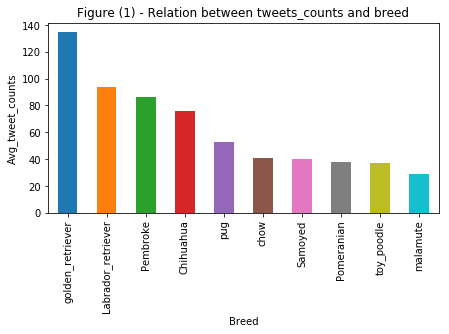

In [163]:
avg_tweet_count_breed.plot(kind = 'bar' , title = 'Figure (1) - Relation between tweets_counts and breed',figsize=(7,3.5))
plt.xlabel('Breed')
plt.ylabel('Avg_tweet_counts');

##### insight 1: Golden_Retriever has most tweets from weratedogs account.

##### 2- relation between retweet_counts and breed to insight the favourite breed for followers.

In [164]:
avg_retweet_count_breed = df.groupby('breed').retweet_count.mean().sort_values(ascending= False)[0:10]
avg_retweet_count_breed

breed
Angora            25661.0
Arabian_camel     19213.5
upright           18963.0
gondola           16814.0
bubble            16159.0
conch             15071.0
revolver          14740.0
prison            14682.0
remote_control    14409.0
beaver            13517.0
Name: retweet_count, dtype: float64

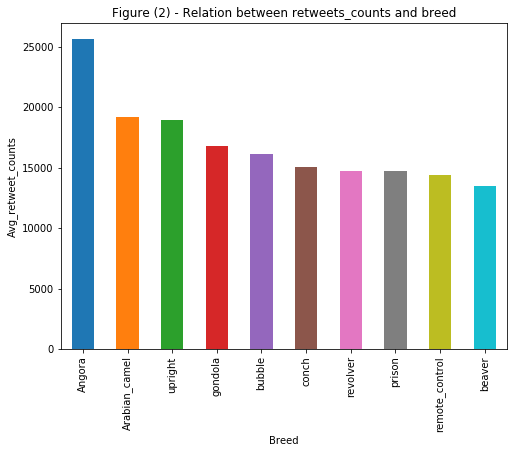

In [165]:
avg_retweet_count_breed.plot(kind = 'bar' , title = 'Figure (2) - Relation between retweets_counts and breed', figsize=(8,6))
plt.xlabel('Breed')
plt.ylabel('Avg_retweet_counts');

##### insight 2: Angora has most retweets from weratedogs followers.

##### 3- relation between favourite_counts and breed insight the favourit breed for followers in another way.

In [166]:
avg_fav_count_breed = df.groupby('breed').favorite_count.mean().sort_values(ascending= False)[0:10]
avg_fav_count_breed

breed
Angora           75193.0
laptop           55098.0
limousine        46959.0
paper_towel      42908.0
orange           39467.0
Arabian_camel    38300.0
prison           35669.0
revolver         35553.0
barbell          35325.0
basketball       35324.0
Name: favorite_count, dtype: float64

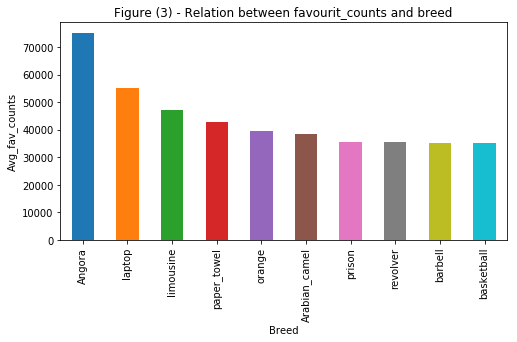

In [167]:
avg_fav_count_breed.plot(kind = 'bar' , title = 'Figure (3) - Relation between favourit_counts and breed', figsize=(8,4))
plt.xlabel('Breed')
plt.ylabel('Avg_fav_counts');

##### insight 3: Angora has most favourite counts from weratedogs followers.

##### 4- the most important breed in tweets counts vs retweet counts .

In [168]:
retweet_golden_retriever = df.groupby('breed').retweet_count.mean().sort_values(ascending= False)['golden_retriever']
retweet_golden_retriever

3632.2222222222222

In [169]:
retweet_Angora = df.groupby('breed').retweet_count.mean().sort_values(ascending= False)['Angora']
retweet_Angora  

25661.0

In [170]:
tweet_Angora = df.groupby('breed').tweet_id.count().sort_values(ascending= False)['Angora']
tweet_Angora

1

In [171]:
tweet_golden_retriever = df.groupby('breed').tweet_id.count().sort_values(ascending= False)['golden_retriever']
tweet_golden_retriever

135

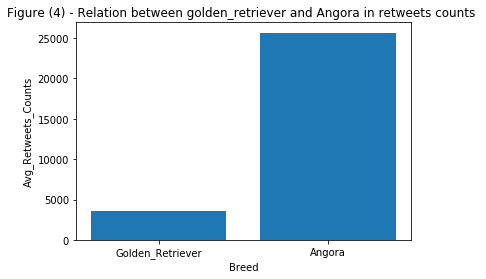

In [172]:
locations = [1, 2]
heights = [retweet_golden_retriever , retweet_Angora ]
labels = ['Golden_Retriever', 'Angora']
plt.bar(locations, heights, tick_label=labels)
plt.title('Figure (4) - Relation between golden_retriever and Angora in retweets counts ')
plt.xlabel('Breed')
plt.ylabel('Avg_Retweets_Counts');

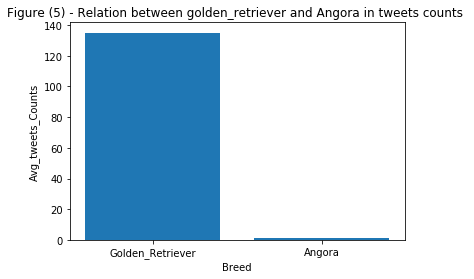

In [173]:
locations = [1, 2]
heights = [tweet_golden_retriever , tweet_Angora ]
labels = ['Golden_Retriever', 'Angora']
plt.bar(locations, heights, tick_label=labels)
plt.title('Figure (5) - Relation between golden_retriever and Angora in tweets counts ')
plt.xlabel('Breed')
plt.ylabel('Avg_tweets_Counts');

##### insight 4: the most important breed in tweet counts from weratedog account doesn't have the same interest and almost ignored from the followers in retweet and favourite counts , vice versa the most important breed in retweet and favourite counts doesn't have the same interest from weratedog account in tweet counts.

##### 5- tweet counts, retweet counts where is dog or not.

In [174]:
df[df['breed'] =='Angora']

,tweet_id,retweet_count,favorite_count,user_count,timestamp,rating_ratio,rating_numerator,rating_denominator,name,breed,accuracy,is_dog,dog_stage,img_num,jpg_url,text,source,expanded_urls
134,859196978902773760,25661,75193,3200891,2017-05-02 00:04:57,1.2,12.0,10,NaN,Angora,0.224218,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/85919...,We only rate dogs. This is quite clearly a smo...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/859196978...


In [175]:
df[df['breed'] =='Arabian_camel']

,tweet_id,retweet_count,favorite_count,user_count,timestamp,rating_ratio,rating_numerator,rating_denominator,name,breed,accuracy,is_dog,dog_stage,img_num,jpg_url,text,source,expanded_urls
397,806629075125202948,37911,75639,3200897,2016-12-07 22:38:52,1.3,13.0,10,NaN,Arabian_camel,0.366248,False,NaN,2,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,"""Good afternoon class today we're going to lea...","<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/806629075...
1737,668988183816871936,516,961,3201012,2015-11-24 03:03:06,0.7,7.0,10,NaN,Arabian_camel,0.999614,False,NaN,1,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,Honor to rate this dog. Lots of fur on him. Tw...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/668988183...


In [176]:
df[df['breed'] =='bubble']

,tweet_id,retweet_count,favorite_count,user_count,timestamp,rating_ratio,rating_numerator,rating_denominator,name,breed,accuracy,is_dog,dog_stage,img_num,jpg_url,text,source,expanded_urls
1331,680221482581123072,329,1598,3200953,2015-12-25 03:00:14,1.0,10.0,10,CeCe,bubble,0.240173,False,NaN,1,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,This is CeCe. She's patiently waiting for Sant...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/680221482...
1430,676219687039057920,31989,67100,3201002,2015-12-14 01:58:31,1.0,10.0,10,Kenneth,bubble,0.997556,False,NaN,1,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,This is Kenneth. He's stuck in a bubble. 10/10...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/676219687...


In [177]:
retweet_not_dog = df.groupby('is_dog').retweet_count.mean()[0]
retweet_not_dog

2910.4954751131222

In [178]:
retweet_dog = df.groupby('is_dog').retweet_count.mean()[1]
retweet_dog

2822.8044382801663

In [179]:
tweet_not_dog = df.groupby('is_dog').tweet_id.count()[0]
tweet_not_dog

442

In [180]:
tweet_dog = df.groupby('is_dog').tweet_id.count()[1]
tweet_dog

1442

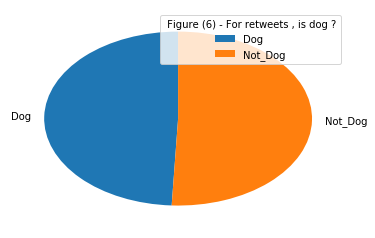

In [181]:
y = np.array([retweet_dog, retweet_not_dog])
mylabels = ['Dog', 'Not_Dog']
plt.pie(y, labels = mylabels , startangle = 90)
plt.legend(title = " Figure (6) - For retweets , is dog ?")
plt.show() 

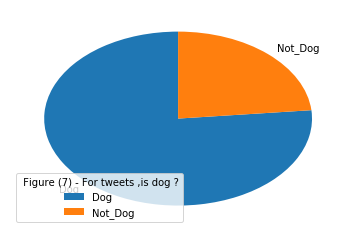

In [182]:
y = np.array([tweet_dog, tweet_not_dog])
mylabels = ['Dog', 'Not_Dog']
plt.pie(y, labels = mylabels , startangle = 90)
plt.legend(title = " Figure (7) - For tweets ,is dog ?")
plt.show() 

##### insight 5: the most breeds in retweet and favourite counts are for other animals not dogs or dogs in weird photoes so the the prediction of it in machine learning is not dog , and these weird tweets have more interaction from follwers than others of normal dogs .

##### 6- ideal time to put tweet in the acoount to get interactions.

In [183]:
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df['datehour'] = df['timestamp'].dt.hour

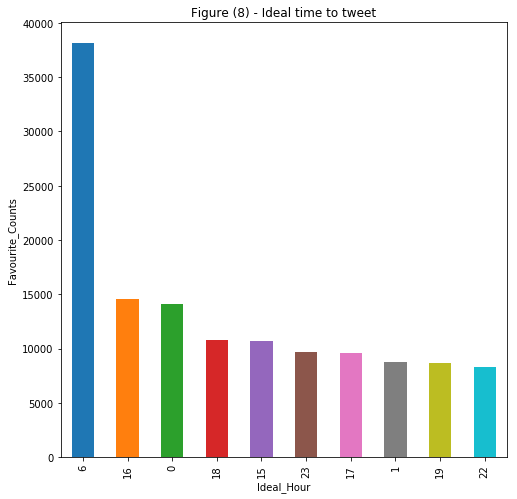

In [184]:
df.timestamp.dt.hour.head
time_ideal = df.groupby(['datehour']).favorite_count.mean().sort_values(ascending= False)[0:10]
time_ideal.plot(kind = 'bar' , title = 'Figure (8) - Ideal time to tweet',figsize=(8,8))
plt.xlabel('Ideal_Hour')
plt.ylabel('Favourite_Counts');

##### insight 6: ideal time to tweet and get interactions is 6 A.M.

##### 7- sactter plot between retweet count and rating ratio.

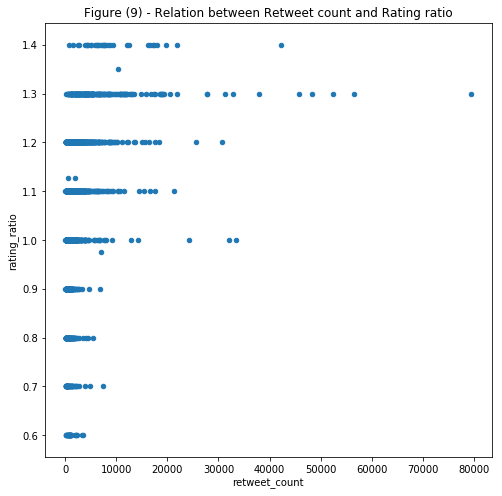

In [185]:
df.plot(x='retweet_count', y='rating_ratio', kind= 'scatter', title = 'Figure (9) - Relation between Retweet count and Rating ratio',figsize=(8,8));

##### insight 7: the relation between retweet count and rating ratio is positive correlation.


##### 8- the relation between tweet time and the rating_numerator.

In [186]:
df_t = df.copy()

In [187]:
df_t.index = df_t['timestamp']
df_t.index 
df_t.drop('timestamp', axis = 1, inplace = True)
df_t.sort_index
data_to_plot = df_t.groupby([(df_t.index.year),(df_t.index.month)]).rating_numerator.mean()
data_to_plot

timestamp  timestamp
2015       11            9.570881
           12           10.618687
2016       1            11.082803
           2            11.066667
           3            12.324561
           4            11.442308
           5            14.303571
           6            10.311688
           7            12.776471
           8            11.051724
           9            11.430656
           10           11.673077
           11           12.038462
           12           11.943396
2017       1            13.363636
           2            12.380952
           3            12.340426
           4            12.225000
           5            12.761905
           6            12.500000
           7            12.806122
           8            13.000000
Name: rating_numerator, dtype: float64

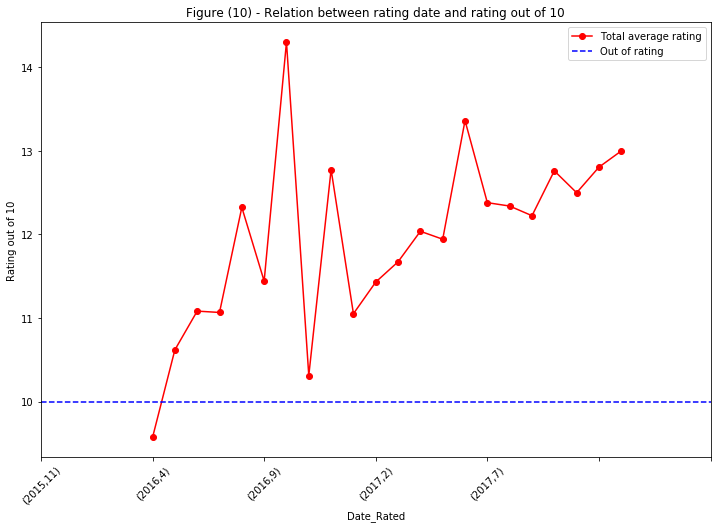

In [188]:
data_to_plot.plot(style='-ro', figsize=(12,8),label='Total average rating',title = 'Figure (10) - Relation between rating date and rating out of 10')
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')
plt.xlabel('Date_Rated')
plt.ylabel('Rating out of 10')
plt.legend()
locs, labels = plt.xticks()
plt.xticks(locs, ('(2015,11)','(2016,4)','(2016,9)','(2017,2)','(2017,7)'),rotation = 45);

##### insight 8: in the beggining of weratedogs the rating numerator was < 10 then the rating method changed.

##### 9- the relation between tweet time and tretweet count.

In [189]:
data_retweets_plot = df_t.groupby([(df_t.index.year),(df_t.index.month)]).retweet_count.mean()
data_retweets_plot

timestamp  timestamp
2015       11            484.459770
           12           1534.910448
2016       1            1436.356688
           2            1592.476190
           3            1678.763158
           4            1630.461538
           5            2183.303571
           6            4107.506494
           7            2508.329412
           8            3718.017241
           9            3725.852459
           10           4274.276923
           11           4922.961538
           12           5471.018868
2017       1            6443.575758
           2            4453.825397
           3            4886.212766
           4            5844.275000
           5            7570.023810
           6            6586.090909
           7            6868.530612
           8            7683.500000
Name: retweet_count, dtype: float64

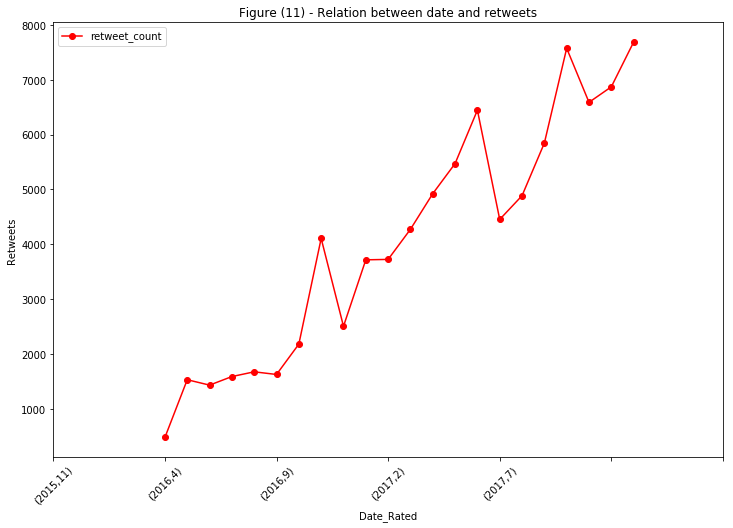

In [190]:
data_retweets_plot.plot(style='-ro', figsize=(12,8),title = 'Figure (11) - Relation between date and retweets')
plt.xlabel('Date_Rated')
plt.ylabel('Retweets')
plt.legend()
locs, labels = plt.xticks()
plt.xticks(locs, ('(2015,11)','(2016,4)','(2016,9)','(2017,2)','(2017,7)'),rotation = 45);

##### insight 9: retweets Number number increases over time and years .

### Note: I also did the explanatory process with tableau software to make insightful dashboards.You can find Tableau dashboards through this link: https://public.tableau.com/app/profile/khaled.yaseen/viz/WeRateDogsAccount/TimeInsights
